# **Loan approval Prediction**



## **Info laadimine Kaggle'ist**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [4]:
print(df_train.shape)

(58645, 13)


Meil on 58645 rida infot mille peal treenida


In [6]:
df_train.head()


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [7]:
print(df_test.shape)


(39098, 12)


Meil on 39098 rida infot mille peal testida läbi kaggle'i


In [9]:
df_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


## **Kontrollime infot**

### **Kas leidub null väärtuseid?**

In [12]:
df_test.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [13]:
df_train.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

Null Väärtuseid ei leidu kummaski

### **Käime üle kõik veerud, ja vaatame kas andmed on korreksed**

#### **Vanus**


In [17]:
df_train["person_age"].describe()

count    58645.000000
mean        27.550857
std          6.033216
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        123.000000
Name: person_age, dtype: float64

**Train andmetes on isik kes on 123 aastat vana, eemaldame ta:**


In [19]:
df_train = df_train[df_train["person_age"] != 123]

In [20]:
df_train["person_age"].describe()

count    58644.000000
mean        27.549229
std          6.020378
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         84.000000
Name: person_age, dtype: float64

In [21]:
df_test["person_age"].describe()

count    39098.000000
mean        27.566781
std          6.032761
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64

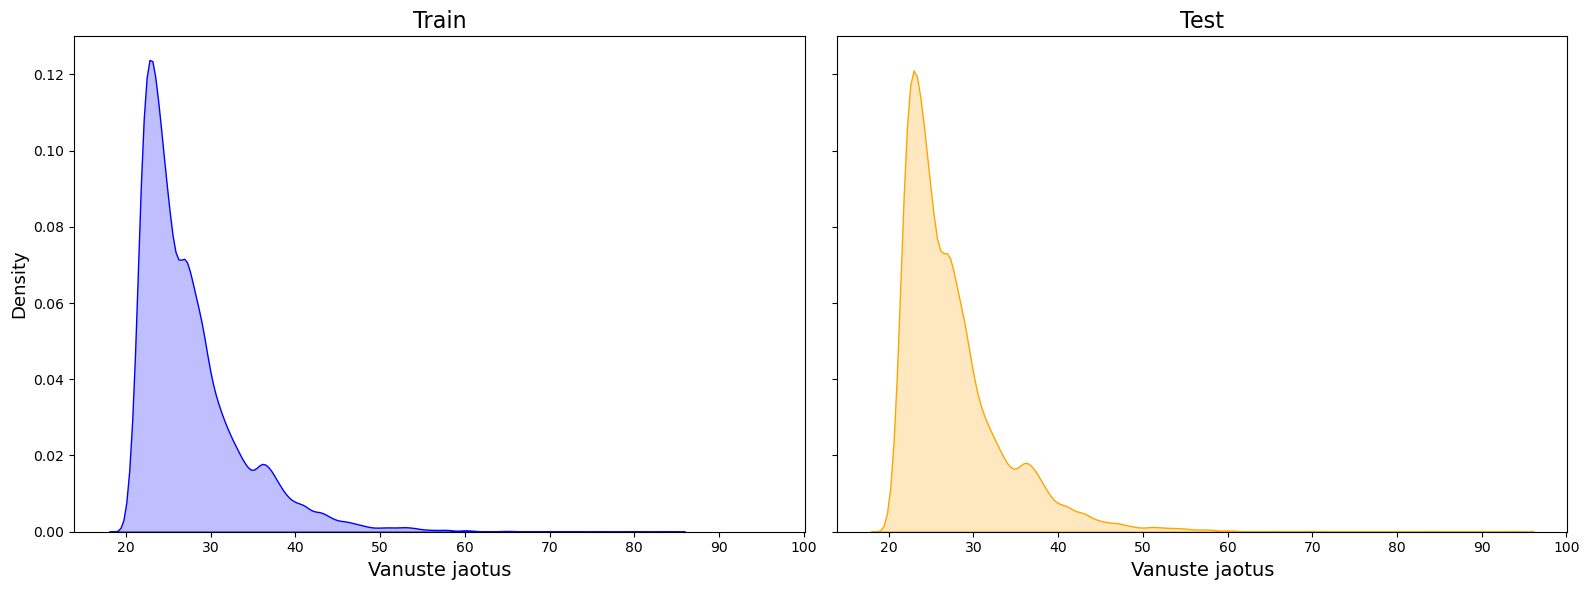

In [22]:


#Et 2 oleks kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

#Train
sns.kdeplot(x=df_train["person_age"], color="blue", fill=True, ax=axes[0])
axes[0].set_title("Train", fontsize=16)
axes[0].set_xlabel("Vanuste jaotus", fontsize=14)
axes[0].set_ylabel("Density", fontsize=13)

#Test
sns.kdeplot(x=df_test["person_age"], color="orange", fill=True, ax=axes[1])
axes[1].set_title("Test", fontsize=16)
axes[1].set_xlabel("Vanuste jaotus", fontsize=14)

plt.tight_layout()
plt.show()

#### **Sissetulek**

In [24]:
#et tuleks loetavad numbrid
pd.options.display.float_format = '{:,.2f}'.format
print(df_train["person_income"].describe())

count      58,644.00
mean       64,046.65
std        37,931.25
min         4,200.00
25%        42,000.00
50%        58,000.00
75%        75,600.00
max     1,900,000.00
Name: person_income, dtype: float64


In [25]:
#et tuleks loetavad numbrid
pd.options.display.float_format = '{:,.2f}'.format
print(df_test["person_income"].describe())

count      39,098.00
mean       64,060.46
std        37,955.83
min         4,000.00
25%        42,000.00
50%        58,000.00
75%        75,885.00
max     1,900,000.00
Name: person_income, dtype: float64


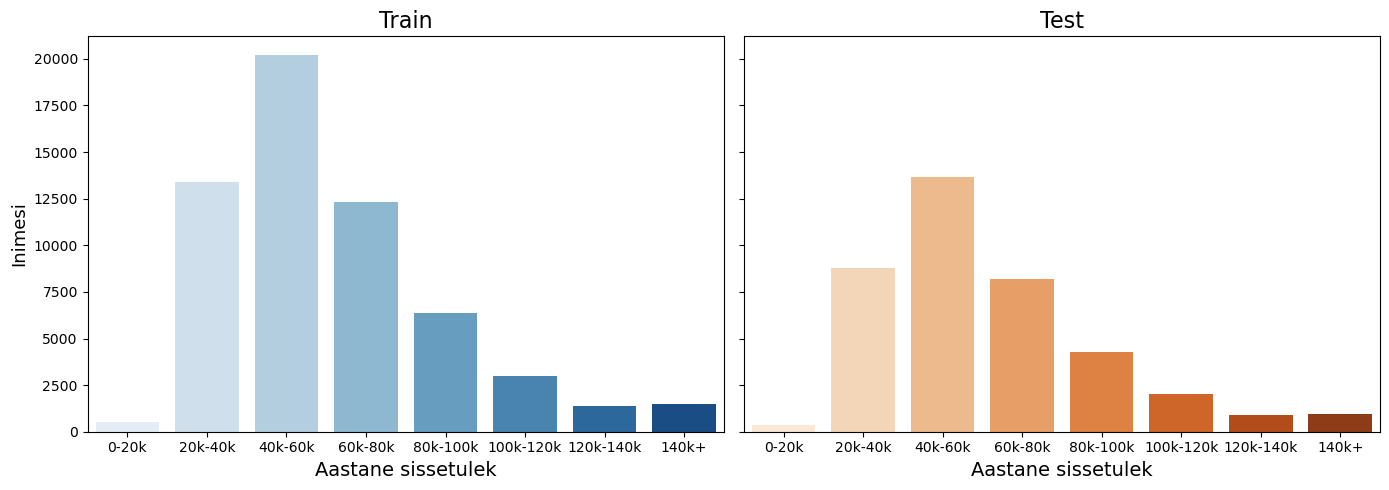

In [26]:


#palga vahemikud
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 2000000]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k+']

# ajutised tulbad, et mitte muuta algsed infot
df_train['salary_range_temp'] = pd.cut(df_train['person_income'], bins=bins, labels=labels, include_lowest=True)
df_test['salary_range_temp'] = pd.cut(df_test['person_income'], bins=bins, labels=labels, include_lowest=True)

# Et 2 kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Train 
sns.countplot(x='salary_range_temp', data=df_train, ax=axes[0], palette='Blues', hue='salary_range_temp',  legend=False)
axes[0].set_title("Train", fontsize=16)
axes[0].set_xlabel("Aastane sissetulek", fontsize=14)
axes[0].set_ylabel("Inimesi", fontsize=13)


# Test 
sns.countplot(x='salary_range_temp', data=df_test, ax=axes[1], palette='Oranges', hue='salary_range_temp', legend=False)
axes[1].set_title("Test", fontsize=16)
axes[1].set_xlabel("Aastane sissetulek", fontsize=14)

# Kustutan ajutised tulbad
df_train.drop(columns=['salary_range_temp'], inplace=True)
df_test.drop(columns=['salary_range_temp'], inplace=True)

plt.tight_layout()
plt.show()

#### **Elukoha omamis liik**

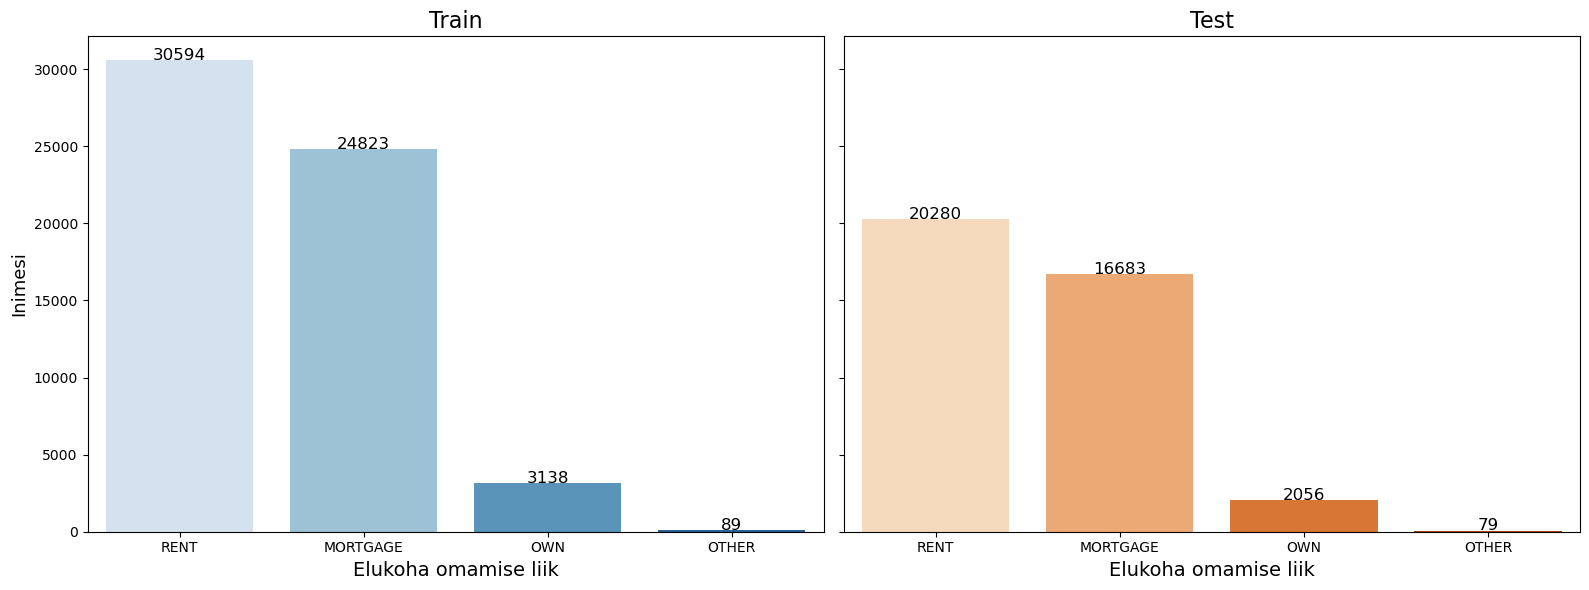

In [28]:
train_counts = df_train["person_home_ownership"].value_counts().reset_index()
test_counts = df_test["person_home_ownership"].value_counts().reset_index()
train_counts.columns = ["home_ownership", "count"]
test_counts.columns = ["home_ownership", "count"]

# et oleks 2 kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Train
train_plot = sns.barplot(x="home_ownership", y="count", data=train_counts, ax=axes[0], palette="Blues", hue='home_ownership',  legend=False)
axes[0].set_title("Train", fontsize=16)
axes[0].set_xlabel("Elukoha omamise liik", fontsize=14)
axes[0].set_ylabel("Inimesi", fontsize=13)

#Lisab numbrid Train andmetele
for bar, count in zip(train_plot.patches, train_counts["count"]):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(count), ha='center', fontsize=12)

# Test
test_plot = sns.barplot(x="home_ownership", y="count", data=test_counts, ax=axes[1], palette="Oranges",  hue='home_ownership',  legend=False)
axes[1].set_title("Test", fontsize=16)
axes[1].set_xlabel("Elukoha omamise liik", fontsize=14)

#Lisab numbrid Test andmetele
for bar, count in zip(test_plot.patches, test_counts["count"]):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(count), ha='center', fontsize=12)


plt.tight_layout()
plt.show()

#### **Tööstaaž aastates**

In [30]:
df_train["person_emp_length"].describe()

count   58,644.00
mean         4.70
std          3.96
min          0.00
25%          2.00
50%          4.00
75%          7.00
max        123.00
Name: person_emp_length, dtype: float64

In [31]:
df_test["person_emp_length"].describe()

count   39,098.00
mean         4.69
std          3.87
min          0.00
25%          2.00
50%          4.00
75%          7.00
max         42.00
Name: person_emp_length, dtype: float64

**Kaks inimest olid käinud tööl 123 aastat, eemaldame nad:**

In [33]:
df_train = df_train[df_train["person_emp_length"] != 123]

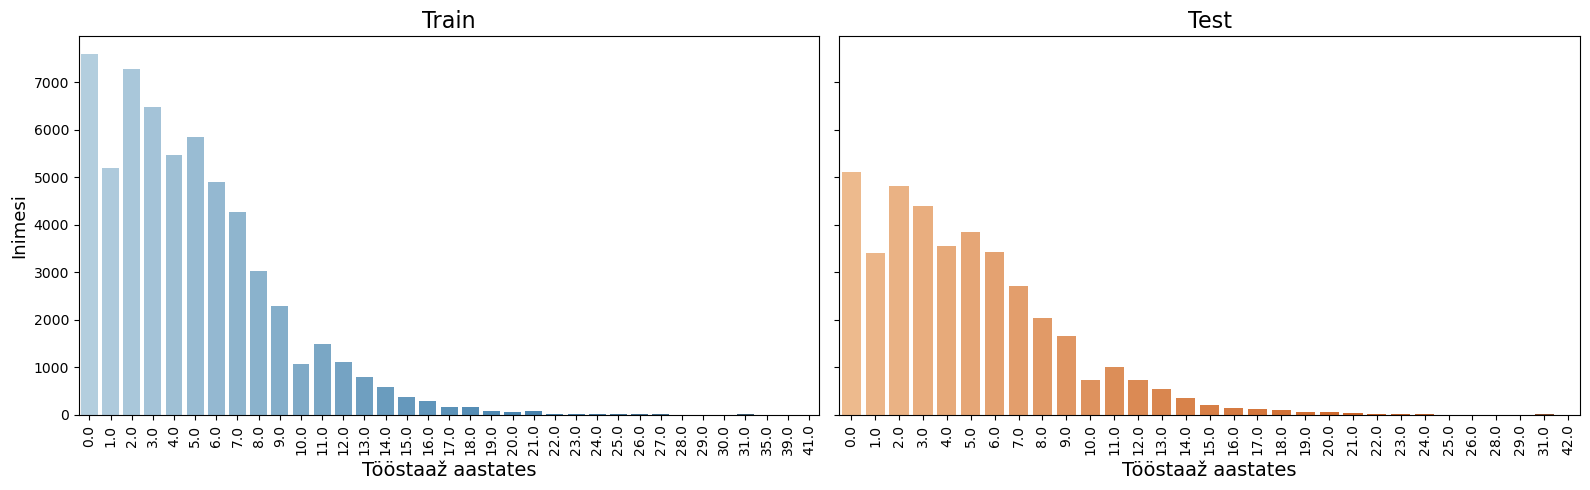

In [34]:
df_train['emp_length_count'] = df_train['person_emp_length'].map(df_train['person_emp_length'].value_counts())
df_test['emp_length_count'] = df_test['person_emp_length'].map(df_test['person_emp_length'].value_counts())

# et 2 oleks kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Train 
sns.barplot(x='person_emp_length', y='emp_length_count', data=df_train, ax=axes[0],hue='person_emp_length',  palette='Blues_d',  legend=False)
axes[0].set_title("Train", fontsize=16)
axes[0].set_xlabel("Tööstaaž aastates", fontsize=14)
axes[0].set_ylabel("Inimesi", fontsize=13)
axes[0].tick_params(axis='x', rotation=90) 

# Test 
sns.barplot(x='person_emp_length', y='emp_length_count', data=df_test, ax=axes[1],hue='person_emp_length', palette='Oranges_d',  legend=False)
axes[1].set_title("Test", fontsize=16)
axes[1].set_xlabel("Tööstaaž aastates", fontsize=14)
axes[1].tick_params(axis='x', rotation=90)  



# Kustutan ajutised tulbad
df_train.drop(columns=['emp_length_count'], inplace=True)
df_test.drop(columns=['emp_length_count'], inplace=True)

plt.tight_layout()
plt.show()

#### **Mille jaoks laenu kasutatakse?**

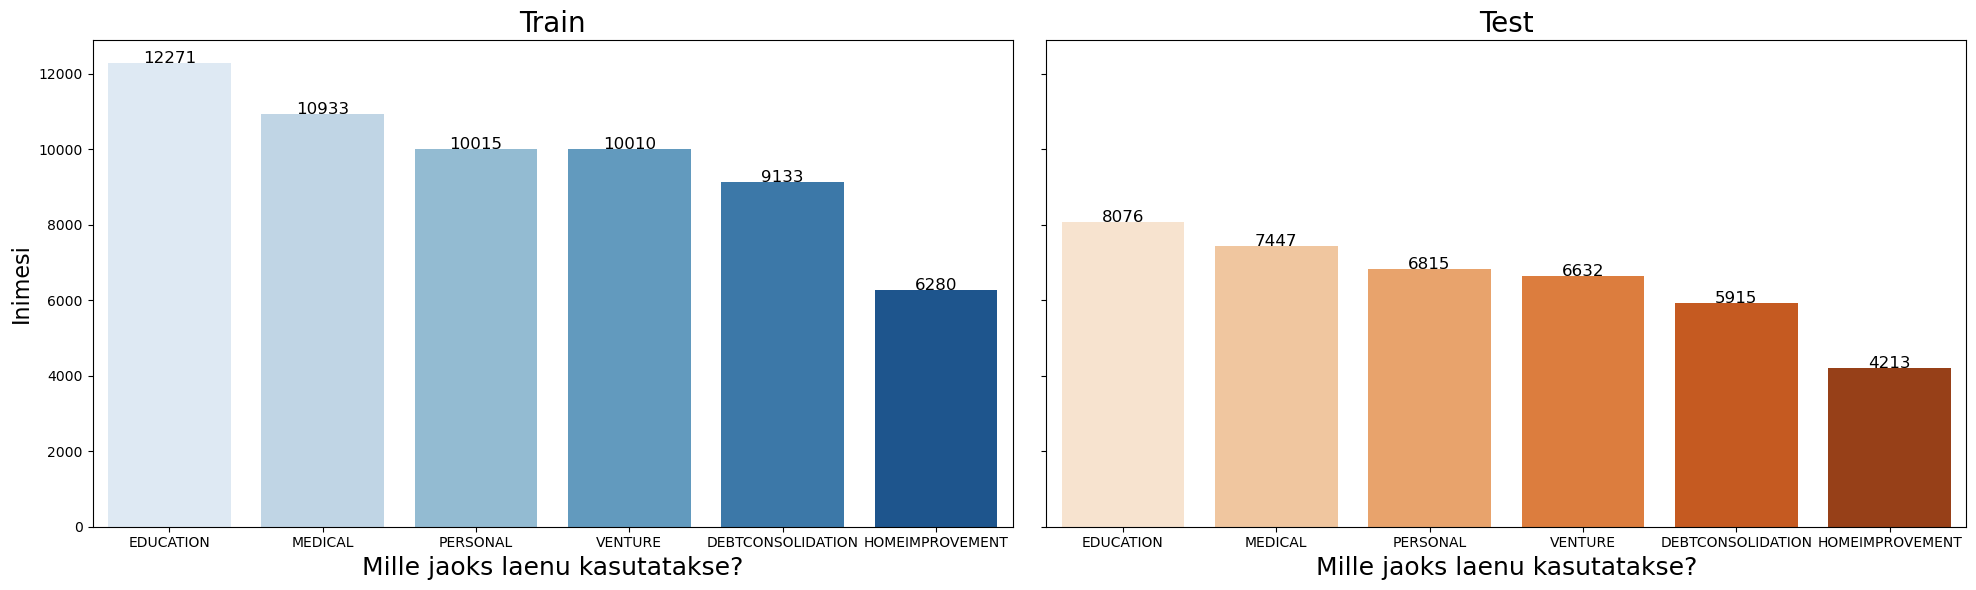

In [36]:
train_counts = df_train["loan_intent"].value_counts().reset_index()
test_counts = df_test["loan_intent"].value_counts().reset_index()
train_counts.columns = ["loan_intent", "count"]
test_counts.columns = ["loan_intent", "count"]

# et oleks 2 kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)



# Train
train_plot = sns.barplot(x="loan_intent", y="count", data=train_counts, ax=axes[0], palette="Blues", hue='loan_intent',  legend=False)
axes[0].set_title("Train", fontsize=20)
axes[0].set_xlabel("Mille jaoks laenu kasutatakse?", fontsize=18)
axes[0].set_ylabel("Inimesi", fontsize=16)

#Lisab numbrid Train andmetele
for bar, count in zip(train_plot.patches, train_counts["count"]):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(count), ha='center', fontsize=12)

# Test
test_plot = sns.barplot(x="loan_intent", y="count", data=test_counts, ax=axes[1], palette="Oranges",  hue='loan_intent',  legend=False)
axes[1].set_title("Test", fontsize=20)
axes[1].set_xlabel("Mille jaoks laenu kasutatakse?", fontsize=18)

#Lisab numbrid Test andmetele
for bar, count in zip(test_plot.patches, test_counts["count"]):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(count), ha='center', fontsize=12)


plt.tight_layout()
plt.show()

#### **Laenu kvaliteet**

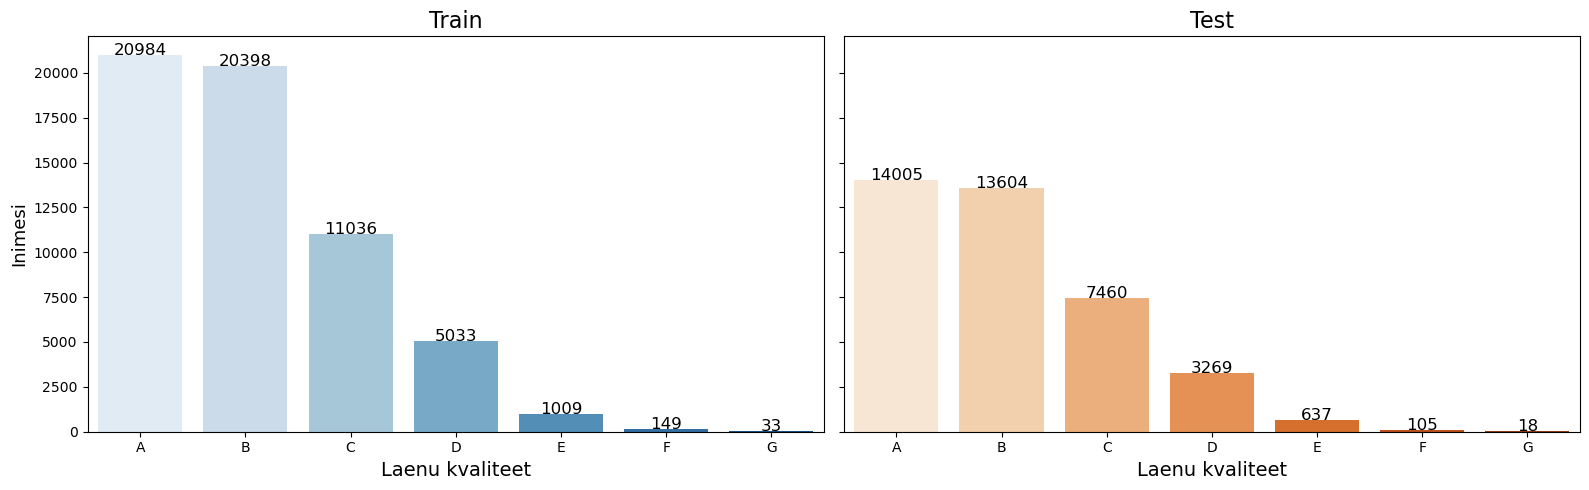

In [38]:
train_counts = df_train["loan_grade"].value_counts().reset_index()
test_counts = df_test["loan_grade"].value_counts().reset_index()
train_counts.columns = ["loan_grade", "count"]
test_counts.columns = ["loan_grade", "count"]

# et oleks 2 kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)


# Train
train_plot = sns.barplot(x="loan_grade", y="count", data=train_counts, ax=axes[0], palette="Blues", hue='loan_grade',  legend=False)
axes[0].set_title("Train", fontsize=16)
axes[0].set_xlabel("Laenu kvaliteet", fontsize=14)
axes[0].set_ylabel("Inimesi", fontsize=13)

#Lisab numbrid Train andmetele
for bar, count in zip(train_plot.patches, train_counts["count"]):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(count), ha='center', fontsize=12)

# Test
test_plot = sns.barplot(x="loan_grade", y="count", data=test_counts, ax=axes[1], palette="Oranges",  hue='loan_grade',  legend=False)
axes[1].set_title("Test", fontsize=16)
axes[1].set_xlabel("Laenu kvaliteet", fontsize=14)

#Lisab numbrid Test andmetele
for bar, count in zip(test_plot.patches, test_counts["count"]):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(count), ha='center', fontsize=12)


plt.tight_layout()
plt.show()

#### **Soovitud laenu suurus**

In [40]:
df_train["loan_amnt"].describe()

count   58,642.00
mean     9,217.15
std      5,563.38
min        500.00
25%      5,000.00
50%      8,000.00
75%     12,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

In [41]:
df_test["loan_amnt"].describe()

count   39,098.00
mean     9,251.47
std      5,576.25
min        700.00
25%      5,000.00
50%      8,000.00
75%     12,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

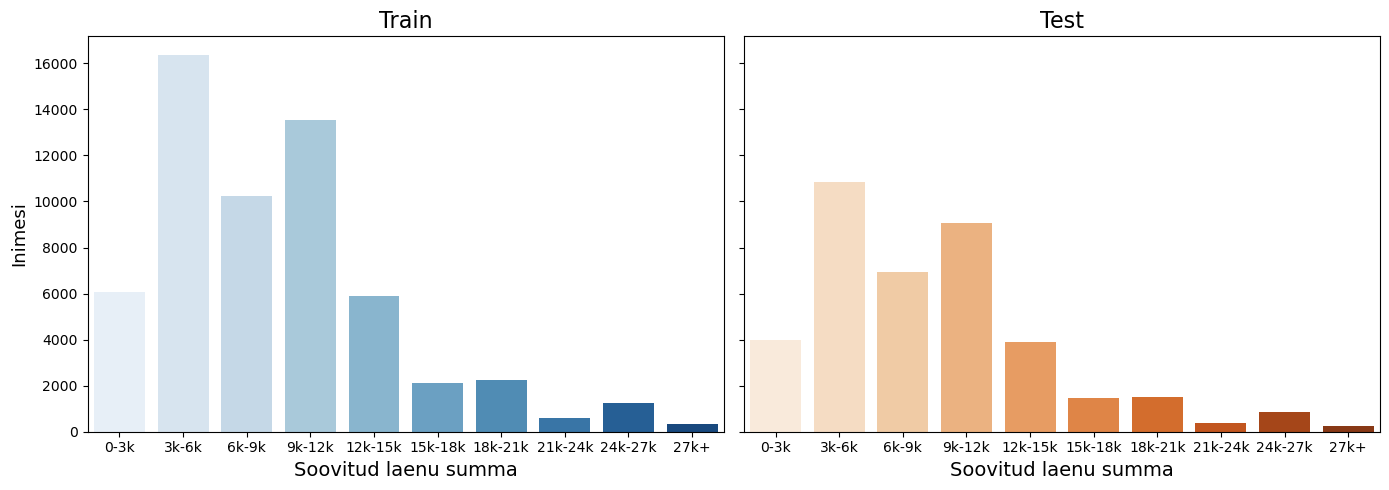

In [42]:
# Leanu summa vahemikud
bins = [0, 3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000, 27000, 36000]
labels = ['0-3k', '3k-6k', '6k-9k', '9k-12k', '12k-15k', '15k-18k', '18k-21k', '21k-24k', '24k-27k', '27k+']

# ajutised tulbad, et mitte muuta algsed infot
df_train['loan_amnt_binned_temp'] = pd.cut(df_train['loan_amnt'], bins=bins, labels=labels, include_lowest=True)
df_test['loan_amnt_binned_temp'] = pd.cut(df_test['loan_amnt'], bins=bins, labels=labels, include_lowest=True)

# et oleks 2 kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Train 
sns.countplot(x='loan_amnt_binned_temp', data=df_train, ax=axes[0], palette='Blues', hue='loan_amnt_binned_temp', legend=False)
axes[0].set_title("Train", fontsize=16)
axes[0].set_xlabel("Soovitud laenu summa", fontsize=14)
axes[0].set_ylabel("Inimesi", fontsize=13)

# Test 
sns.countplot(x='loan_amnt_binned_temp', data=df_test, ax=axes[1], palette='Oranges', hue='loan_amnt_binned_temp', legend=False)
axes[1].set_title("Test", fontsize=16)
axes[1].set_xlabel("Soovitud laenu summa", fontsize=14)

# Kustutan ajutised tulbad
df_train.drop(columns=['loan_amnt_binned_temp'], inplace=True)
df_test.drop(columns=['loan_amnt_binned_temp'], inplace=True)

plt.tight_layout()
plt.show()

#### **Laenu intress %**

In [44]:
df_train["loan_int_rate"].describe()

count   58,642.00
mean        10.68
std          3.03
min          5.42
25%          7.88
50%         10.75
75%         12.99
max         23.22
Name: loan_int_rate, dtype: float64

In [45]:
df_test["loan_int_rate"].describe()

count   39,098.00
mean        10.66
std          3.02
min          5.42
25%          7.88
50%         10.75
75%         12.99
max         22.11
Name: loan_int_rate, dtype: float64

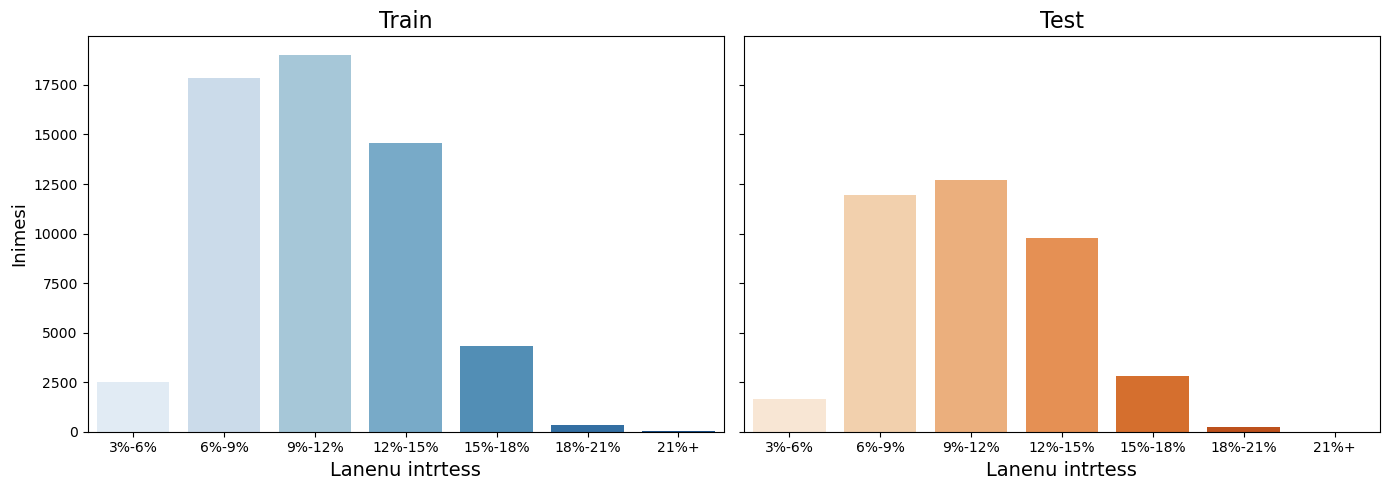

In [46]:
# Leanu intresside vahemikud
bins = [ 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]
labels = [ '3%-6%', '6%-9%', '9%-12%', '12%-15%', '15%-18%', '18%-21%', '21%+']

# ajutised tulbad, et mitte muuta algsed infot
df_train['loan_int_rate_binned_temp'] = pd.cut(df_train['loan_int_rate'], bins=bins, labels=labels, include_lowest=True)
df_test['loan_int_rate_binned_temp'] = pd.cut(df_test['loan_int_rate'], bins=bins, labels=labels, include_lowest=True)

# et oleks 2 kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Train 
sns.countplot(x='loan_int_rate_binned_temp', data=df_train, ax=axes[0], palette='Blues', hue='loan_int_rate_binned_temp', legend=False,)
axes[0].set_title("Train", fontsize=16)
axes[0].set_xlabel("Lanenu intrtess", fontsize=14)
axes[0].set_ylabel("Inimesi", fontsize=13)

# Test 
sns.countplot(x='loan_int_rate_binned_temp', data=df_test, ax=axes[1], palette='Oranges', hue='loan_int_rate_binned_temp', legend=False)
axes[1].set_title("Test", fontsize=16)
axes[1].set_xlabel("Lanenu intrtess", fontsize=14)

# Kustutan ajutised tulbad
df_train.drop(columns=['loan_int_rate_binned_temp'], inplace=True)
df_test.drop(columns=['loan_int_rate_binned_temp'], inplace=True)

plt.tight_layout()
plt.show()

#### **Leanu osa sissetulekust**

In [48]:
df_train["loan_percent_income"].describe()

count   58,642.00
mean         0.16
std          0.09
min          0.00
25%          0.09
50%          0.14
75%          0.21
max          0.83
Name: loan_percent_income, dtype: float64

In [49]:
df_test["loan_percent_income"].describe()

count   39,098.00
mean         0.16
std          0.09
min          0.00
25%          0.09
50%          0.14
75%          0.21
max          0.73
Name: loan_percent_income, dtype: float64

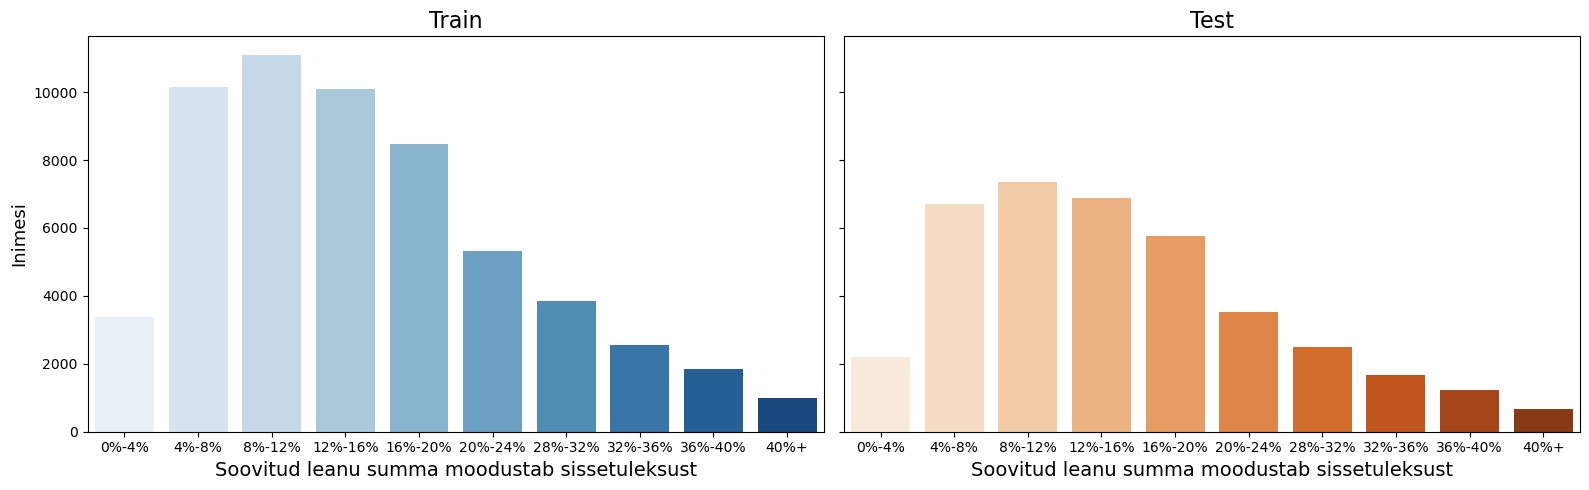

In [50]:
# Leanu osa sissetulekust vahemikud
bins = [0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4]
labels = ['0%-4%', '4%-8%', '8%-12%', '12%-16%', '16%-20%', '20%-24%', '28%-32%', '32%-36%', '36%-40%', '40%+']

# ajutised tulbad, et mitte muuta algsed infot
df_train['loan_percent_income_binned_temp'] = pd.cut(df_train['loan_percent_income'], bins=bins, labels=labels, include_lowest=True)
df_test['loan_percent_income_binned_temp'] = pd.cut(df_test['loan_percent_income'], bins=bins, labels=labels, include_lowest=True)

# et oleks 2 kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Train 
sns.countplot(x='loan_percent_income_binned_temp', data=df_train, ax=axes[0], palette='Blues', hue='loan_percent_income_binned_temp', legend=False,)
axes[0].set_title("Train", fontsize=16)
axes[0].set_xlabel("Soovitud leanu summa moodustab sissetuleksust", fontsize=14)
axes[0].set_ylabel("Inimesi", fontsize=13)

# Test 
sns.countplot(x='loan_percent_income_binned_temp', data=df_test, ax=axes[1], palette='Oranges', hue='loan_percent_income_binned_temp', legend=False)
axes[1].set_title("Test", fontsize=16)
axes[1].set_xlabel("Soovitud leanu summa moodustab sissetuleksust", fontsize=14)

# Kustutan ajutised tulbad
df_train.drop(columns=['loan_percent_income_binned_temp'], inplace=True)
df_test.drop(columns=['loan_percent_income_binned_temp'], inplace=True)

plt.tight_layout()
plt.show()

#### **Kas inimene on jätnud laenukohustused tätimata**

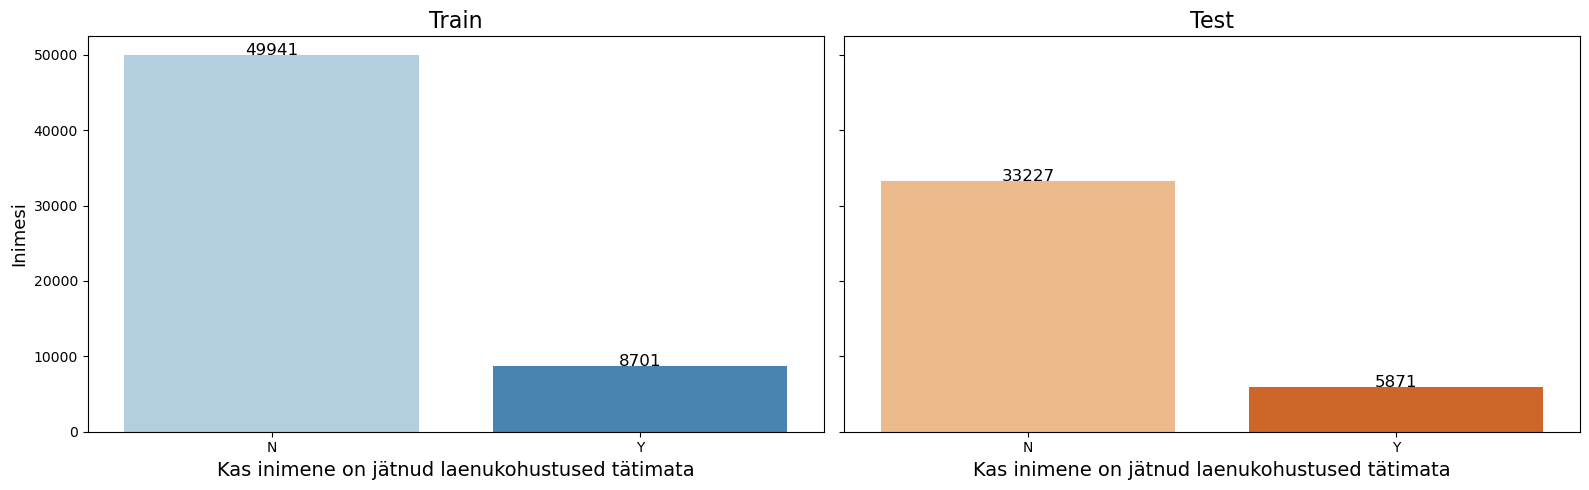

In [52]:
train_counts = df_train["cb_person_default_on_file"].value_counts().reset_index()
test_counts = df_test["cb_person_default_on_file"].value_counts().reset_index()
train_counts.columns = ["cb_person_default_on_file", "count"]
test_counts.columns = ["cb_person_default_on_file", "count"]

# et oleks 2 kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)


# Train
train_plot = sns.barplot(x="cb_person_default_on_file", y="count", data=train_counts, ax=axes[0], palette="Blues", hue='cb_person_default_on_file',  legend=False)
axes[0].set_title("Train", fontsize=16)
axes[0].set_xlabel("Kas inimene on jätnud laenukohustused tätimata", fontsize=14)
axes[0].set_ylabel("Inimesi", fontsize=13)

#Lisab numbrid Train andmetele
for bar, count in zip(train_plot.patches, train_counts["count"]):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(count), ha='center', fontsize=12)

# Test
test_plot = sns.barplot(x="cb_person_default_on_file", y="count", data=test_counts, ax=axes[1], palette="Oranges",  hue='cb_person_default_on_file',  legend=False)
axes[1].set_title("Test", fontsize=16)
axes[1].set_xlabel("Kas inimene on jätnud laenukohustused tätimata", fontsize=14)

#Lisab numbrid Test andmetele
for bar, count in zip(test_plot.patches, test_counts["count"]):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(count), ha='center', fontsize=12)


plt.tight_layout()
plt.show()

#### **Krediidiajaloo pikkus**

In [54]:
df_train["cb_person_cred_hist_length"].describe()

count   58,642.00
mean         5.81
std          4.03
min          2.00
25%          3.00
50%          4.00
75%          8.00
max         30.00
Name: cb_person_cred_hist_length, dtype: float64

In [55]:
df_test["cb_person_cred_hist_length"].describe()

count   39,098.00
mean         5.83
std          4.07
min          2.00
25%          3.00
50%          4.00
75%          8.00
max         30.00
Name: cb_person_cred_hist_length, dtype: float64

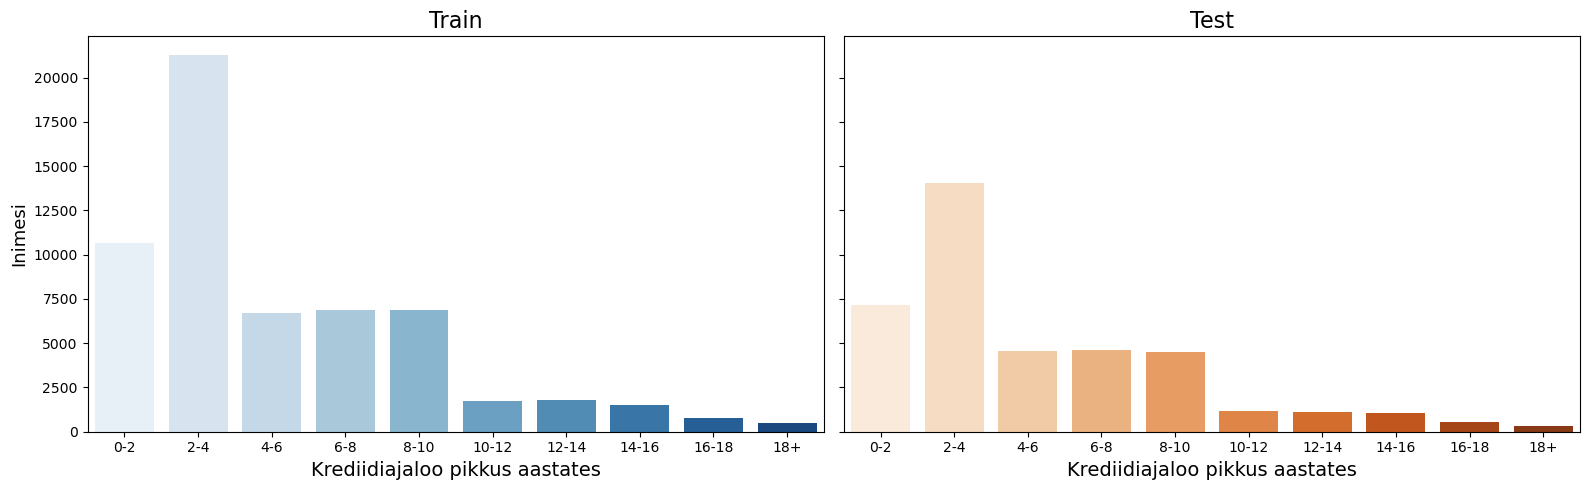

In [56]:
# Leanu intresside vahemikud
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 40]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18+']

# ajutised tulbad, et mitte muuta algsed infot
df_train['cb_person_cred_hist_length_binned_temp'] = pd.cut(df_train['cb_person_cred_hist_length'], bins=bins, labels=labels, include_lowest=True)
df_test['cb_person_cred_hist_length_binned_temp'] = pd.cut(df_test['cb_person_cred_hist_length'], bins=bins, labels=labels, include_lowest=True)

# et oleks 2 kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Train 
sns.countplot(x='cb_person_cred_hist_length_binned_temp', data=df_train, ax=axes[0], palette='Blues', hue='cb_person_cred_hist_length_binned_temp', legend=False,)
axes[0].set_title("Train", fontsize=16)
axes[0].set_xlabel("Krediidiajaloo pikkus aastates", fontsize=14)
axes[0].set_ylabel("Inimesi", fontsize=13)

# Test 
sns.countplot(x='cb_person_cred_hist_length_binned_temp', data=df_test, ax=axes[1], palette='Oranges', hue='cb_person_cred_hist_length_binned_temp', legend=False)
axes[1].set_title("Test", fontsize=16)
axes[1].set_xlabel("Krediidiajaloo pikkus aastates", fontsize=14)

# Kustutan ajutised tulbad
df_train.drop(columns=['cb_person_cred_hist_length_binned_temp'], inplace=True)
df_test.drop(columns=['cb_person_cred_hist_length_binned_temp'], inplace=True)

plt.tight_layout()
plt.show()

## **Vaatame iga atribuudi põhjal laenu saamis %**

#### **Palju inimesi sai laenud**


In [59]:
df_train["loan_status"].value_counts()

loan_status
0    50293
1     8349
Name: count, dtype: int64

In [60]:
vastus = 8349 / 50293 * 100
print(round(vastus, 2), "%")

16.6 %


**16.6% inimestest kes kandideerisid laenule said laenu.**

#### **Vanus ja laenu saamise %**

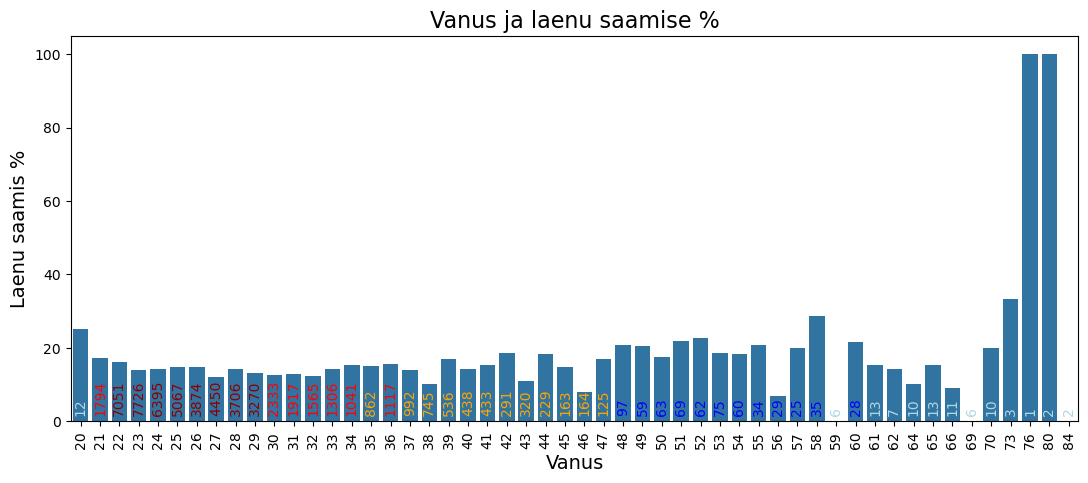

In [63]:
def get_color_by_value(value):
    if value <= 20:
        return 'lightblue'
    elif value <= 100:
        return 'blue'
    elif value <= 100:
        return 'lightgreen'
    elif value <= 1000:
        return 'orange'
    elif value <= 2500:
        return 'red'    
    else:
        return 'darkred'

#UUS ajutine tabel vajaliku infoga
tempdf = df_train[['loan_status', 'person_age']].groupby(['person_age'], as_index=False).mean()  # loan approval %
tempdf['loan_status'] *= 100  # %-ideks
tempdf2 = df_train[['person_age']].groupby(['person_age'], as_index=False).value_counts()  
combined_df = pd.merge(tempdf, tempdf2, on='person_age', how='left')


plt.figure(figsize=[13,5])
sns.barplot(x='person_age', y='loan_status', data=combined_df)

# Inimeste arvu kuvamiseks
for index, row in combined_df.iterrows():
    count_value = int(row['count'])
    color = get_color_by_value(count_value)  # Saab värvi inimeste arvu põhjal
    plt.text(
        x=index,
        y=+ 2.2,  # Y-positsioon
        s=f"{int(row['count'])}", # komad võtab ära
        ha='center',  
        fontsize=10, 
        color=color,  
        rotation=90  
    )


plt.title('Vanus ja laenu saamise %', fontsize=16)
plt.xlabel('Vanus', fontsize=14)
plt.ylabel('Laenu saamis %', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [64]:
# vaatame vanuses 76-80 inimesis, sest neil 100% laenu saamine
vanused_76_83 = df_train[(df_train['person_age'] >= 76) & (df_train['person_age'] < 84)]
print(vanused_76_83)

          id  person_age  person_income person_home_ownership  \
15588  15588          80          54000                  RENT   
16954  16954          76          30000                  RENT   
21953  21953          80          30000                  RENT   

       person_emp_length      loan_intent loan_grade  loan_amnt  \
15588              27.00         PERSONAL          A      10000   
16954               2.00  HOMEIMPROVEMENT          D       6500   
21953               7.00          MEDICAL          D       5000   

       loan_int_rate  loan_percent_income cb_person_default_on_file  \
15588           6.62                 0.19                         N   
16954          16.77                 0.21                         N   
21953          14.96                 0.17                         N   

       cb_person_cred_hist_length  loan_status  
15588                          25            1  
16954                          24            1  
21953                          24     

#### **Aastane sissetulek ja laenu saamise %**

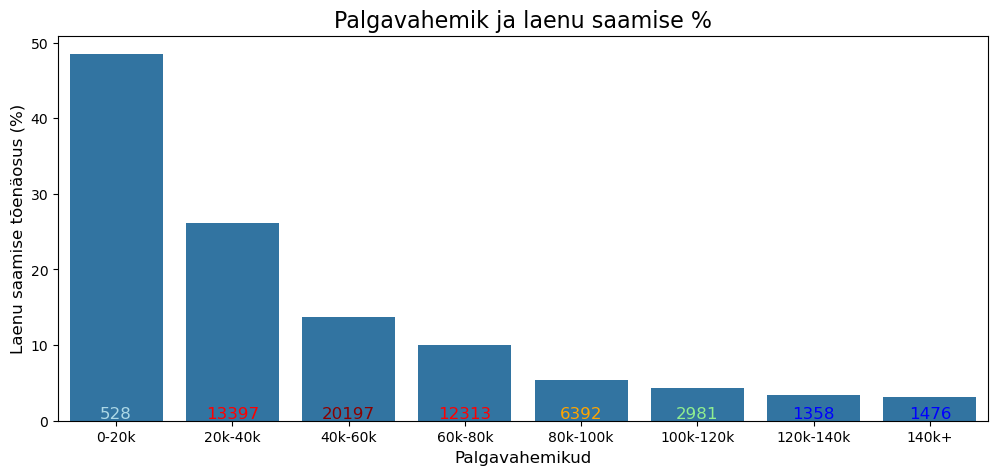

In [66]:
def get_color_by_value(value):
    if value <= 1000:
        return 'lightblue'
    elif value <= 2000:
        return 'blue'
    elif value <= 5000:
        return 'lightgreen'
    elif value <= 10000:
        return 'orange'
    elif value <= 20000:
        return 'red'    
    else:
        return 'darkred'

# Palga vahemikud
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 2000000]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k+']

# Ajutinde veerg
df_train['salary_range_temp'] = pd.cut(df_train['person_income'], bins=bins, labels=labels, include_lowest=True)

#UUS ajutine tabel vajaliku infoga
tempdf = df_train.groupby(['salary_range_temp'], as_index=False, observed=True)['loan_status'].mean()
tempdf['loan_status'] *= 100  # %-ideks
tempdf2 = df_train['salary_range_temp'].value_counts().reset_index()  # Count people in each bin
combined_df = pd.merge(tempdf, tempdf2, on='salary_range_temp', how='left')


plt.figure(figsize=[12, 5])
sns.barplot(x='salary_range_temp', y='loan_status', data=combined_df)

# Inimeste arvu kuvamiseks
for index, row in combined_df.iterrows():
    count_value = int(row['count'])
    color = get_color_by_value(count_value)  # Saab värvi inimeste arvu põhjal
    plt.text(
        x=index, 
        y= + 0.3,  
        s=f"{count_value}",  
        ha='center', 
        fontsize=12,  
        color=color,  
    )


plt.title('Palgavahemik ja laenu saamise %', fontsize=16)
plt.xlabel('Palgavahemikud', fontsize=12)
plt.ylabel('Laenu saamise tõenäosus (%)', fontsize=12)
plt.show()

# Kustutab ajutise veeru
df_train.drop(columns=['salary_range_temp'], inplace=True)


#### **Elukoha omamis liik ja laenu saamise %**

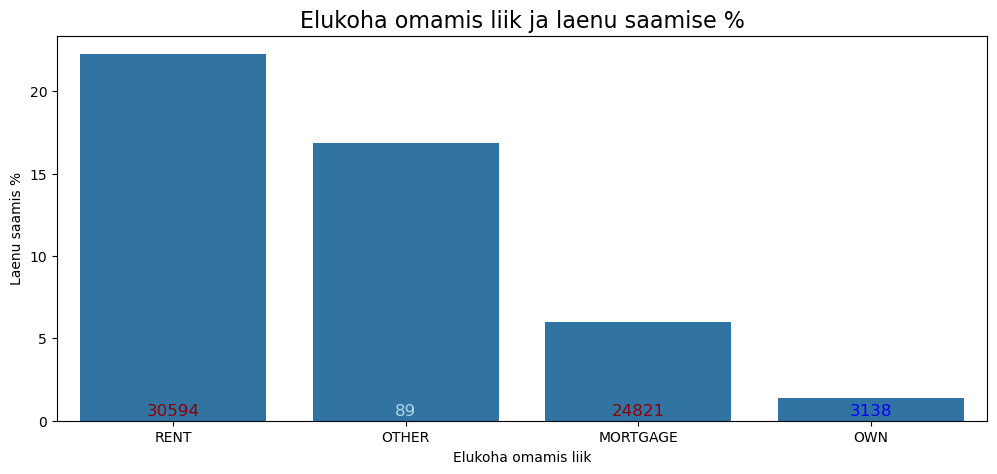

In [68]:
    def get_color_by_value(value):
        if value <= 1000:
            return 'lightblue'
        elif value <= 5000:
            return 'blue'
        elif value <= 10000:
            return 'orange'
        elif value <= 20000:
            return 'red'    
        else:
            return 'darkred'

    plt.figure(figsize=[12,5])

    #UUS ajutine tabel vajaliku infoga
    tempdf = df_train[['loan_status','person_home_ownership']].groupby(['person_home_ownership'], as_index=False).mean()
    tempdf['loan_status'] = tempdf['loan_status']*100 # %-ideks
    tempdf.sort_values(by='loan_status', ascending=False, inplace=True)
    tempdf2 = df_train[['person_home_ownership']].groupby(['person_home_ownership'], as_index=False).value_counts()  
    combined_df = pd.merge(tempdf, tempdf2, on='person_home_ownership', how='left')

    # Inimeste arvu kuvamiseks
    for index, row in combined_df.iterrows():
        count_value = int(row['count'])
        color = get_color_by_value(count_value)  # Saab värvi inimeste arvu põhjal
        plt.text(
            x=index, 
            y=0.3,  
            s=f"{count_value}",  
            ha='center', 
            fontsize=12,  
            color=color,  
        )

    sns.barplot(x='person_home_ownership', y = 'loan_status', data = combined_df)
    plt.title('Elukoha omamis liik ja laenu saamise %', fontsize= 16)
    plt.xlabel('Elukoha omamis liik')
    plt.ylabel('Laenu saamis %')
    plt.show()

#### **Tööstaaž aastates ja laenu saamise %**

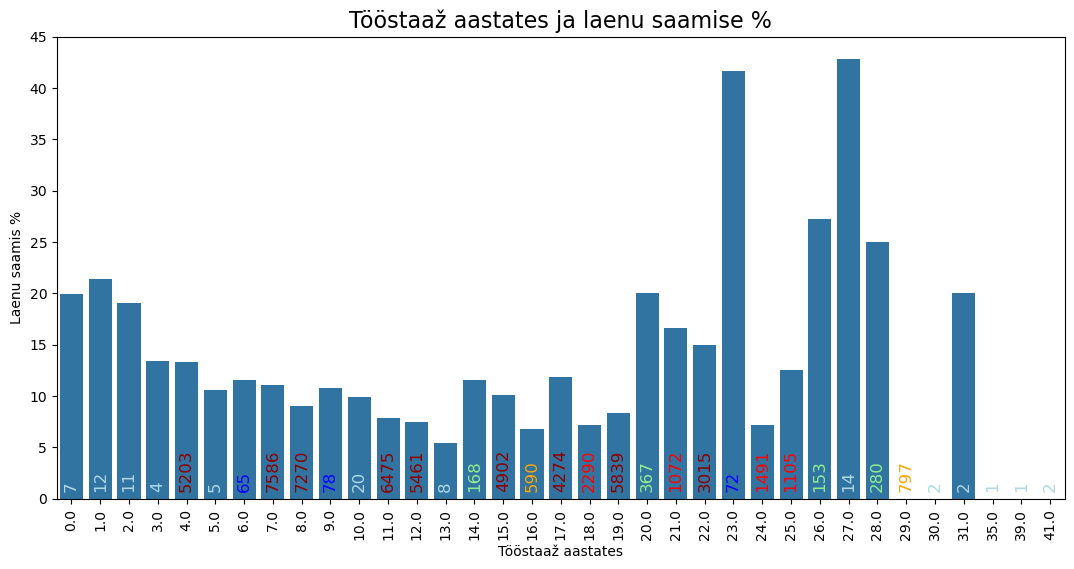

In [70]:
def get_color_by_value(value):
    if value <= 20:
        return 'lightblue'
    elif value <= 100:
        return 'blue'
    elif value <= 500:
        return 'lightgreen'
    elif value <= 1000:
        return 'orange'
    elif value <= 2500:
        return 'red'    
    else:
        return 'darkred'



#UUS ajutine tabel vajaliku infoga
tempdf = df_train[['loan_status','person_emp_length']].groupby(['person_emp_length'], as_index=False).mean()
tempdf['loan_status'] = tempdf['loan_status'] * 100  # %-ideks
tempdf.sort_values(by='loan_status', ascending=False, inplace=True)
tempdf2 = df_train[['person_emp_length']].groupby(['person_emp_length'], as_index=False).value_counts()
combined_df = pd.merge(tempdf, tempdf2, on='person_emp_length', how='left')


plt.figure(figsize=[13,6])
sns.barplot(x='person_emp_length', y='loan_status', data=combined_df)

# Inimeste arvu kuvamiseks
for index, row in combined_df.iterrows():
    count_value = int(row['count'])
    color = get_color_by_value(count_value)  # Saab värvi inimeste arvu põhjal
    plt.text(
        x=index, 
        y=+1 ,  
        s=f"{count_value}", 
        ha='center', 
        fontsize=12,  
        color=color,  
        rotation=90  
    )



plt.title('Tööstaaž aastates ja laenu saamise %', fontsize=16)
plt.xlabel('Tööstaaž aastates')
plt.ylabel('Laenu saamis %')
plt.xticks(rotation=90)  
plt.show()


#### **Mille jaoks laenu kasutatakse ja laenu saamise %**

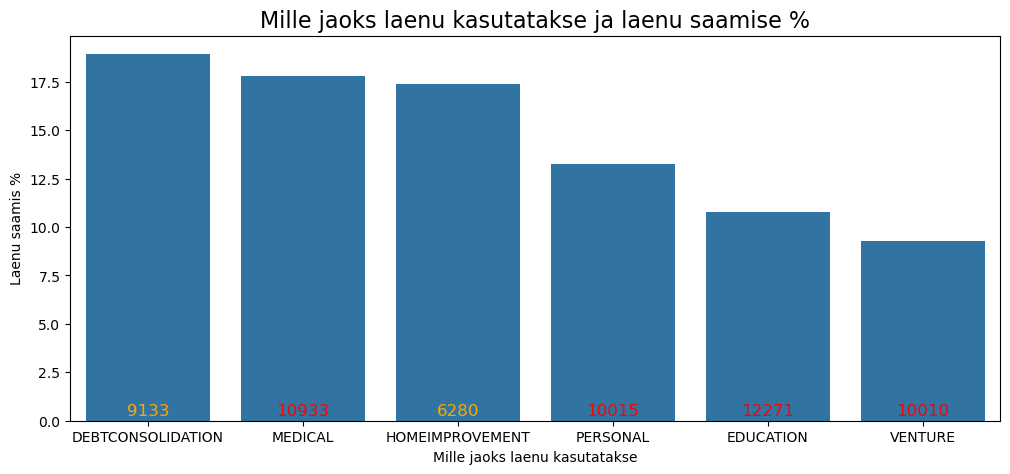

In [72]:
    def get_color_by_value(value):
        if value <= 1000:
            return 'lightblue'
        elif value <= 5000:
            return 'blue'
        elif value <= 10000:
            return 'orange'
        elif value <= 20000:
            return 'red'    
        else:
            return 'darkred'
            
    plt.figure(figsize=[12,5])

    #UUS ajutine tabel vajaliku infoga
    tempdf = df_train[['loan_status','loan_intent']].groupby(['loan_intent'], as_index=False).mean()
    tempdf['loan_status'] = tempdf['loan_status']*100 # %-ideks
    tempdf.sort_values(by='loan_status', ascending=False, inplace=True)
    tempdf2 = df_train[['loan_intent']].groupby(['loan_intent'], as_index=False).value_counts()  
    combined_df = pd.merge(tempdf, tempdf2, on='loan_intent', how='left')

    # Inimeste arvu kuvamiseks
    for index, row in combined_df.iterrows():
        count_value = int(row['count'])
        color = get_color_by_value(count_value)  # Saab värvi inimeste arvu põhjal
        plt.text(
            x=index, 
            y=0.3,  
            s=f"{count_value}",  
            ha='center', 
            fontsize=12,  
            color=color,  
        )

    sns.barplot(x='loan_intent', y = 'loan_status', data = combined_df)
    plt.title('Mille jaoks laenu kasutatakse ja laenu saamise %', fontsize= 16)
    plt.xlabel('Mille jaoks laenu kasutatakse')
    plt.ylabel('Laenu saamis %')
    plt.show()

#### **Laenu kvaliteet ja laenu saamis %**

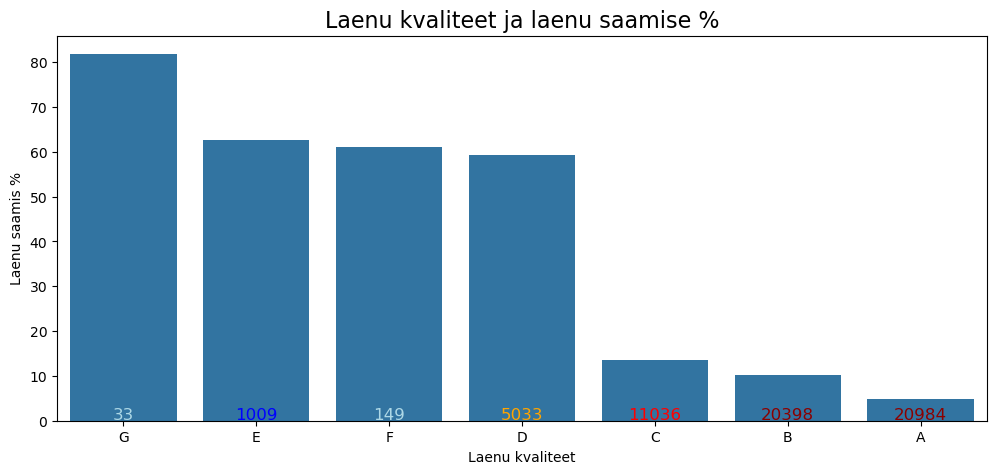

In [74]:
    def get_color_by_value(value):
        if value <= 1000:
            return 'lightblue'
        elif value <= 5000:
            return 'blue'
        elif value <= 10000:
            return 'orange'
        elif value <= 20000:
            return 'red'    
        else:
            return 'darkred'


    plt.figure(figsize=[12,5])

    #UUS ajutine tabel vajaliku infoga
    tempdf = df_train[['loan_status','loan_grade']].groupby(['loan_grade'], as_index=False).mean()
    tempdf['loan_status'] = tempdf['loan_status']*100 # %-ideks
    tempdf.sort_values(by='loan_status', ascending=False, inplace=True)
    tempdf2 = df_train[['loan_grade']].groupby(['loan_grade'], as_index=False).value_counts()  
    combined_df = pd.merge(tempdf, tempdf2, on='loan_grade', how='left')

    # Inimeste arvu kuvamiseks
    for index, row in combined_df.iterrows():
        count_value = int(row['count'])
        color = get_color_by_value(count_value)  # Saab värvi inimeste arvu põhjal
        plt.text(
            x=index, 
            y=0.3,  
            s=f"{count_value}",  
            ha='center', 
            fontsize=12,  
            color=color,  
        )

    sns.barplot(x='loan_grade', y = 'loan_status', data = combined_df)
    plt.title('Laenu kvaliteet ja laenu saamise %', fontsize= 16)
    plt.xlabel('Laenu kvaliteet')
    plt.ylabel('Laenu saamis %')
    plt.show()

#### **Soovitud laenu suurus ja laenu saamise %**

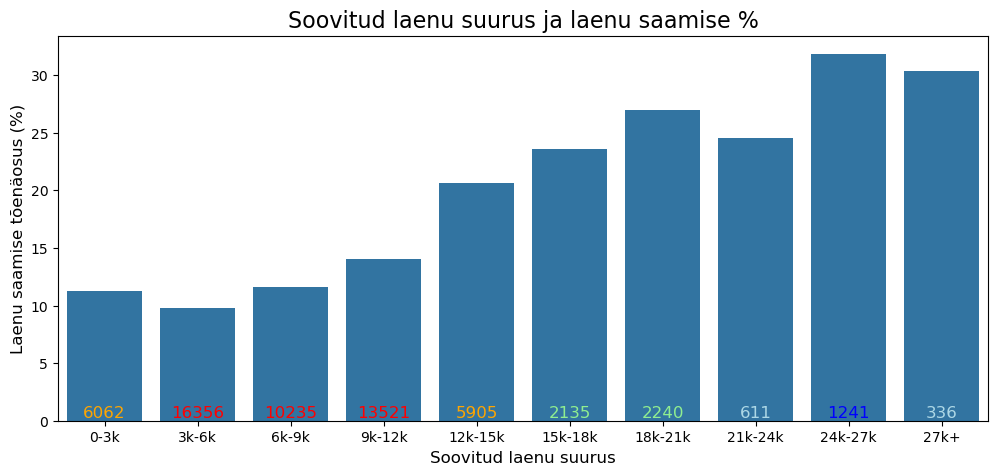

In [76]:
def get_color_by_value(value):
    if value <= 1000:
        return 'lightblue'
    elif value <= 2000:
        return 'blue'
    elif value <= 5000:
        return 'lightgreen'
    elif value <= 10000:
        return 'orange'
    elif value <= 20000:
        return 'red'    
    else:
        return 'darkred'
# Laenu suuruse vahemikud
bins = [0, 3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000, 27000, 36000]
labels = ['0-3k', '3k-6k', '6k-9k', '9k-12k', '12k-15k', '15k-18k', '18k-21k', '21k-24k', '24k-27k', '27k+']

# Ajutine laenu veerg
df_train['loan_amnt_temp'] = pd.cut(df_train['loan_amnt'], bins=bins, labels=labels, include_lowest=True)

#UUS ajutine tabel vajaliku infoga
tempdf = df_train.groupby(['loan_amnt_temp'], as_index=False, observed=True)['loan_status'].mean()
tempdf['loan_status'] = tempdf['loan_status'] * 100  # %-ideks
tempdf2 = df_train['loan_amnt_temp'].value_counts().reset_index() 
combined_df = pd.merge(tempdf, tempdf2, on='loan_amnt_temp', how='left')


plt.figure(figsize=[12, 5])
sns.barplot(x='loan_amnt_temp', y='loan_status', data=combined_df)

# Inimeste arvu kuvamiseks
for index, row in combined_df.iterrows():
    count_value = int(row['count'])
    color = get_color_by_value(count_value)  # Saab värvi inimeste arvu põhjal
    plt.text(
        x=index, 
        y=+ 0.3,  
        s=f"{count_value}",  
        ha='center', 
        fontsize=12,  
        color=color, 
    )


plt.title('Soovitud laenu suurus ja laenu saamise %', fontsize=16)
plt.xlabel('Soovitud laenu suurus', fontsize=12)
plt.ylabel('Laenu saamise tõenäosus (%)', fontsize=12)
plt.show()

# EEmaldan ajutise veeru
df_train.drop(columns=['loan_amnt_temp'], inplace=True)


#### **Leanu intressi määr ja leanus saamise %**

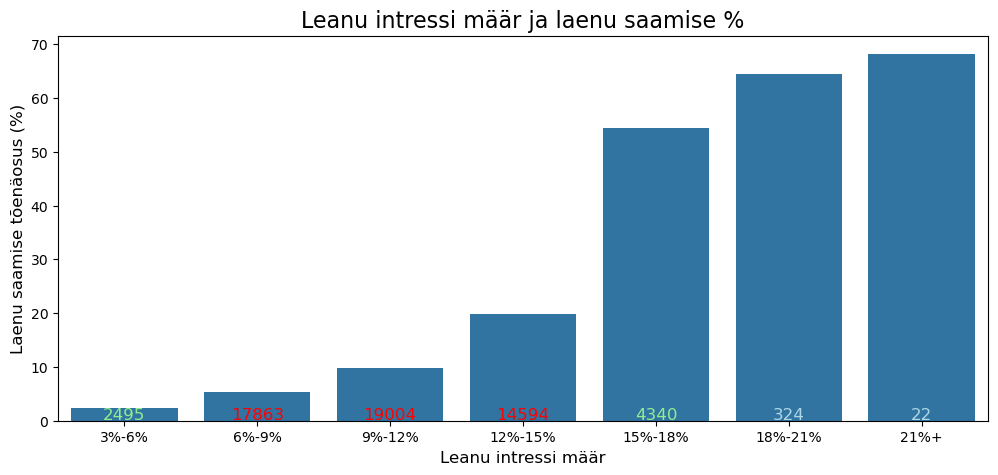

In [78]:
def get_color_by_value(value):
    if value <= 1000:
        return 'lightblue'
    elif value <= 2000:
        return 'blue'
    elif value <= 5000:
        return 'lightgreen'
    elif value <= 10000:
        return 'orange'
    elif value <= 20000:
        return 'red'    
    else:
        return 'darkred'

# Intresside vahemikud
bins = [3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]
labels = ['3%-6%', '6%-9%', '9%-12%', '12%-15%', '15%-18%', '18%-21%', '21%+']

# Ajutine veerg
df_train['loan_int_rate_temp'] = pd.cut(df_train['loan_int_rate'], bins=bins, labels=labels, include_lowest=True)

#UUS ajutine tabel vajaliku infoga
tempdf = df_train.groupby(['loan_int_rate_temp'], as_index=False, observed=True)['loan_status'].mean()
tempdf['loan_status'] = tempdf['loan_status'] * 100 # %-ideks 
tempdf2 = df_train['loan_int_rate_temp'].value_counts().reset_index()
combined_df = pd.merge(tempdf, tempdf2, on='loan_int_rate_temp', how='left')


plt.figure(figsize=[12, 5])
sns.barplot(x='loan_int_rate_temp', y='loan_status', data=combined_df)

# Inimeste arvu kuvamiseks
for index, row in combined_df.iterrows():
    count_value = int(row['count'])
    color = get_color_by_value(count_value)  # Saab värvi inimeste arvu põhjal
    plt.text(
        x=index,  
        y=+ 0.3,  
        s=f"{count_value}",  
        ha='center', 
        fontsize=12,  
        color=color,  
    )

# Title and labels
plt.title('Leanu intressi määr ja laenu saamise %', fontsize=16)
plt.xlabel('Leanu intressi määr', fontsize=12)
plt.ylabel('Laenu saamise tõenäosus (%)', fontsize=12)
plt.show()

# Eemaldan ajutise veeru
df_train.drop(columns=['loan_int_rate_temp'], inplace=True)




#### **Kui suure osa moodustab laen sissetulekust ja laenu saamis %**

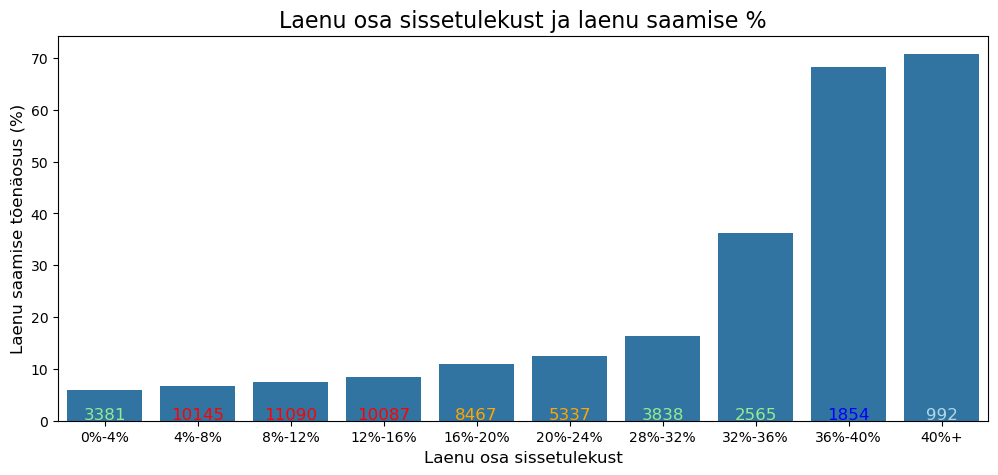

In [80]:
def get_color_by_value(value):
    if value <= 1000:
        return 'lightblue'
    elif value <= 2000:
        return 'blue'
    elif value <= 5000:
        return 'lightgreen'
    elif value <= 10000:
        return 'orange'
    elif value <= 20000:
        return 'red'    
    else:
        return 'darkred'

# Laenu osa sissetulekust vahemikud
bins = [0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4]
labels = ['0%-4%', '4%-8%', '8%-12%', '12%-16%', '16%-20%', '20%-24%', '28%-32%', '32%-36%', '36%-40%', '40%+']

# Ajutine veerg
df_train['loan_percent_income_temp'] = pd.cut(df_train['loan_percent_income'], bins=bins, labels=labels, include_lowest=True)

#UUS ajutine tabel vajaliku infoga
tempdf = df_train.groupby(['loan_percent_income_temp'], as_index=False, observed=True)['loan_status'].mean()
tempdf['loan_status'] = tempdf['loan_status'] * 100  # %-ideks
tempdf2 = df_train['loan_percent_income_temp'].value_counts().reset_index()
combined_df = pd.merge(tempdf, tempdf2, on='loan_percent_income_temp', how='left')


plt.figure(figsize=[12, 5])
sns.barplot(x='loan_percent_income_temp', y='loan_status', data=combined_df)

# Inimeste arvu kuvamiseks
for index, row in combined_df.iterrows():
    count_value = int(row['count'])
    color = get_color_by_value(count_value)  # Saab värvi inimeste arvu põhjal
    plt.text(
        x=index,  
        y= + 0.3,  
        s=f"{count_value}",  
        ha='center', 
        fontsize=12,  
        color=color, 
    )


plt.title('Laenu osa sissetulekust ja laenu saamise %', fontsize=16)
plt.xlabel('Laenu osa sissetulekust', fontsize=12)
plt.ylabel('Laenu saamise tõenäosus (%)', fontsize=12)
plt.show()

# Eemaldan ajutise veeru
df_train.drop(columns=['loan_percent_income_temp'], inplace=True)





#### **Kas inimene on jätnud laenukohustused täitmata ja laenu saamis %**

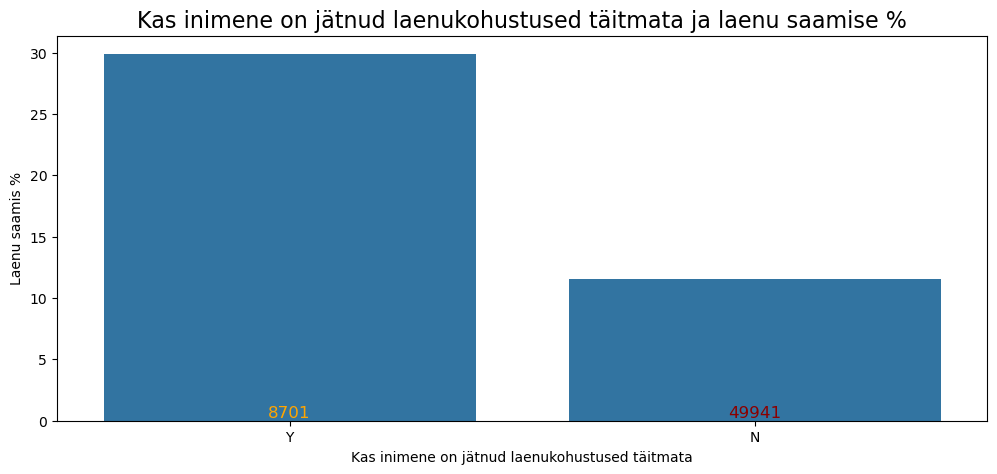

In [82]:
    def get_color_by_value(value):
        if value <= 1000:
            return 'lightblue'
        elif value <= 2000:
            return 'blue'
        elif value <= 5000:
            return 'lightgreen'
        elif value <= 10000:
            return 'orange'
        elif value <= 20000:
            return 'red'    
        else:
            return 'darkred'
    

    plt.figure(figsize=[12,5])

    #UUS ajutine tabel vajaliku infoga
    tempdf = df_train[['loan_status','cb_person_default_on_file']].groupby(['cb_person_default_on_file'], as_index=False).mean()
    tempdf['loan_status'] = tempdf['loan_status']*100
    tempdf.sort_values(by='loan_status', ascending=False, inplace=True)
    tempdf2 = df_train[['cb_person_default_on_file']].groupby(['cb_person_default_on_file'], as_index=False).value_counts()  
    combined_df = pd.merge(tempdf, tempdf2, on='cb_person_default_on_file', how='left')

    # Inimeste arvu kuvamiseks
    for index, row in combined_df.iterrows():
        count_value = int(row['count'])
        color = get_color_by_value(count_value)  # Saab värvi inimeste arvu põhjal
        plt.text(
            x=index, 
            y=0.3,  
            s=f"{count_value}",  
            ha='center', 
            fontsize=12,  
            color=color,  
        )

    sns.barplot(x='cb_person_default_on_file', y = 'loan_status', data = combined_df)
    plt.title('Kas inimene on jätnud laenukohustused täitmata ja laenu saamise %', fontsize= 16)
    plt.xlabel('Kas inimene on jätnud laenukohustused täitmata')
    plt.ylabel('Laenu saamis %')
    plt.show()

#### **Krediidiajaloo pikkus ja laenu saamise %**

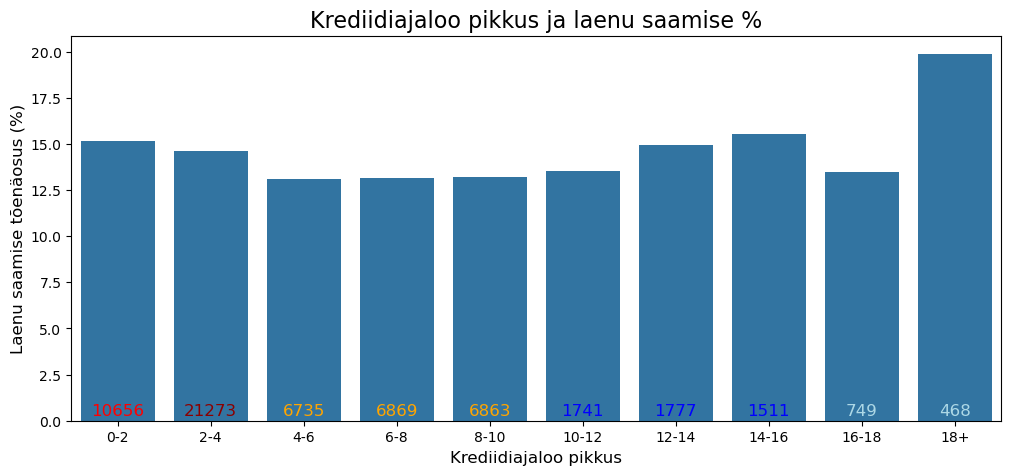

In [84]:
def get_color_by_value(value):
    if value <= 1000:
        return 'lightblue'
    elif value <= 2000:
        return 'blue'
    elif value <= 5000:
        return 'lightgreen'
    elif value <= 10000:
        return 'orange'
    elif value <= 20000:
        return 'red'    
    else:
        return 'darkred'

# Krediidiajaloo vahemikud
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 40]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18+']

# Ajutine veerg
df_train['cb_person_cred_hist_length_temp'] = pd.cut(df_train['cb_person_cred_hist_length'], bins=bins, labels=labels, include_lowest=True)

#UUS ajutine tabel vajaliku infoga
tempdf = df_train.groupby(['cb_person_cred_hist_length_temp'], as_index=False, observed=True)['loan_status'].mean()
tempdf['loan_status'] = tempdf['loan_status'] * 100 
tempdf2 = df_train['cb_person_cred_hist_length_temp'].value_counts().reset_index()
combined_df = pd.merge(tempdf, tempdf2, on='cb_person_cred_hist_length_temp', how='left')


plt.figure(figsize=[12, 5])
sns.barplot(x='cb_person_cred_hist_length_temp', y='loan_status', data=combined_df)

# Inimeste arvu kuvamiseks
for index, row in combined_df.iterrows():
    count_value = int(row['count'])
    color = get_color_by_value(count_value) # Saab värvi inimeste arvu põhjal
    plt.text(
        x=index, 
        y= + 0.3,  
        s=f"{count_value}",  
        ha='center', 
        fontsize=12,  
        color=color, 
    )

# Title and labels
plt.title('Krediidiajaloo pikkus ja laenu saamise %', fontsize=16)
plt.xlabel('Krediidiajaloo pikkus', fontsize=12)
plt.ylabel('Laenu saamise tõenäosus (%)', fontsize=12)
plt.show()


# Eemalda anjutise veeru
df_train.drop(columns=['cb_person_cred_hist_length_temp'], inplace=True)


## **Mudelite treenimine**

**Vajalike teekide importimine**

In [87]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

**Vajalikud andmed**

In [89]:
train_data = df_train
test_data = df_test

print(f"Train data shape:{train_data.shape}\nTest data shape:{test_data.shape}")

Train data shape:(58642, 13)
Test data shape:(39098, 12)


#### **Teisendame kategoorilised veerud numbriteks, kasutades siltide kodeeringut**

kategooriliste andmete kodeerimise, et muuta need numbrilisteks väärtusteks, mida masinõppemudelid saavad töödelda.
1) categorical_columns loetleb andmestiku kategoorilised veerud, mis vajavad kodeerimist.
2) LabelEncoder() loob objekti, mis suudab kategoorilisi väärtusi numbrilisteks koodideks muuta.
3) le.fit_transform() treenib kodeerijat ja muudab treeningandmete kategoorilised väärtused numbrilisteks.
4) le.transform() rakendab sama kodeerimist testandmetele, et need oleks samamoodi kodeeritud.
5) label_encoders[col] salvestab iga veeru kodeerija objekti, et vajadusel saaks seda hiljem kasutada (nt kui on vaja uusi andmeid tagasi dekodeerida).
\

See etapp on oluline, et tagada, et kõik kategoorilised veerud oleksid masinõppemudeli jaoks sobivas vormingus, tagades sujuva treening- ja prognoosimisprotsessi.*

In [91]:
# Kategooriliste tunnuste kodeerimine
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])
    label_encoders[col] = le

#### **Treening- ja valideerimisandmete jaotamine**

In [93]:
X =  train_data.drop(columns=['loan_status', 'id'])
y =  train_data['loan_status']

# Jaotan andmed (80% treening, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_val.shape)

(46913, 11) (11729, 11)


### **Decision tree**

In [95]:
# Algata ja treeni otsustuspuu mudel
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Ennusta testandmete põhjal
y_pred = model.predict(X_val)

# Mudeli hindamine
accuracy = accuracy_score(y_val, y_pred)
print("Täpsus:", accuracy)

# Klassifikatsiooniaruanne
print("Segadusmaatriks:\n", confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Täpsus: 0.9110751129678575
Segadusmaatriks:
 [[9499  560]
 [ 483 1187]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10059
           1       0.68      0.71      0.69      1670

    accuracy                           0.91     11729
   macro avg       0.82      0.83      0.82     11729
weighted avg       0.91      0.91      0.91     11729



#### **Hüperparameetrid**


In [97]:
from sklearn.model_selection import GridSearchCV

# Hüperparameetrite ruudustik
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearch
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Parim mudel ja täpsus
best_model = grid_search.best_estimator_
print("Parimad parameetrid:", grid_search.best_params_)
print("Parima mudeli täpsus:", grid_search.best_score_)


# Ennusta testandmete põhjal, kasutades parimat mudelit
y_pred = best_model.predict(X_val)

# Segadusmaatriks
cm = confusion_matrix(y_val, y_pred)
print("Segadusmaatriks:\n", cm)
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

Parimad parameetrid: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Parima mudeli täpsus: 0.945708166592462
Segadusmaatriks:
 [[9927  132]
 [ 506 1164]]
True Negatives: 9927
False Positives: 132
False Negatives: 506
True Positives: 1164


#### **ROC, et leida optimaalne cutoff**

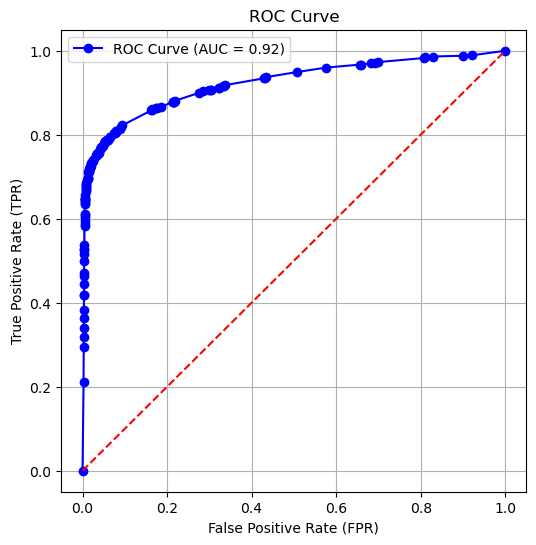

Optimal Threshold: 0.6153846153846154
True Positive Rate at Optimal Threshold: 0.6844311377245509
False Positive Rate at Optimal Threshold: 0.009245451834178348


In [99]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = best_model.predict_proba(X_val)[:, 1]  # Predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_val, y_probs)  # ROC curve metrics
roc_auc = auc(fpr, tpr)  # Area Under the Curve (AUC)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, marker='o', linestyle='-', color='b', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.grid(True)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')  # Diagonal reference line
plt.legend()
plt.show()

# Find the index where FPR is closest to 0
idx = (fpr <= 0.01).nonzero()[0]  # Allow a very small tolerance for FPR close to 0
if len(idx) > 0:
    idx = idx[-1]  # Take the highest TPR for the lowest FPR
else:
    idx = 0  # Default to the first index if FPR can't be close to 0

# Get the optimal threshold
optimal_threshold = thresholds[idx]
optimal_tpr = tpr[idx]
optimal_fpr = fpr[idx]

print("Optimal Threshold:", optimal_threshold)
print("True Positive Rate at Optimal Threshold:", optimal_tpr)
print("False Positive Rate at Optimal Threshold:", optimal_fpr)

**Meil on vaja, et False Positive rate olen võimalikult madal, sest siis on True Negative rate võimalikult kõrge**

In [101]:
# Compute probabilities for the positive class
y_probs = best_model.predict_proba(X_val)[:, 1]  

# Apply the custom cutoff
optimal_threshold = optimal_threshold  
y_pred_custom = (y_probs >= optimal_threshold).astype(int)

# Evaluate the model using the custom threshold
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_val, y_pred_custom)
accuracy = accuracy_score(y_val, y_pred_custom)

print("Confusion Matrix with Custom Cutoff:\n", conf_matrix)
print("Accuracy with Custom Cutoff:", accuracy)

Confusion Matrix with Custom Cutoff:
 [[9966   93]
 [ 527 1143]]
Accuracy with Custom Cutoff: 0.9471395685906727


Feature Importances:
                       Feature  Importance
8          loan_percent_income        0.33
5                   loan_grade        0.26
2        person_home_ownership        0.18
4                  loan_intent        0.10
1                person_income        0.05
3            person_emp_length        0.04
7                loan_int_rate        0.02
6                    loan_amnt        0.01
10  cb_person_cred_hist_length        0.01
0                   person_age        0.00
9    cb_person_default_on_file        0.00


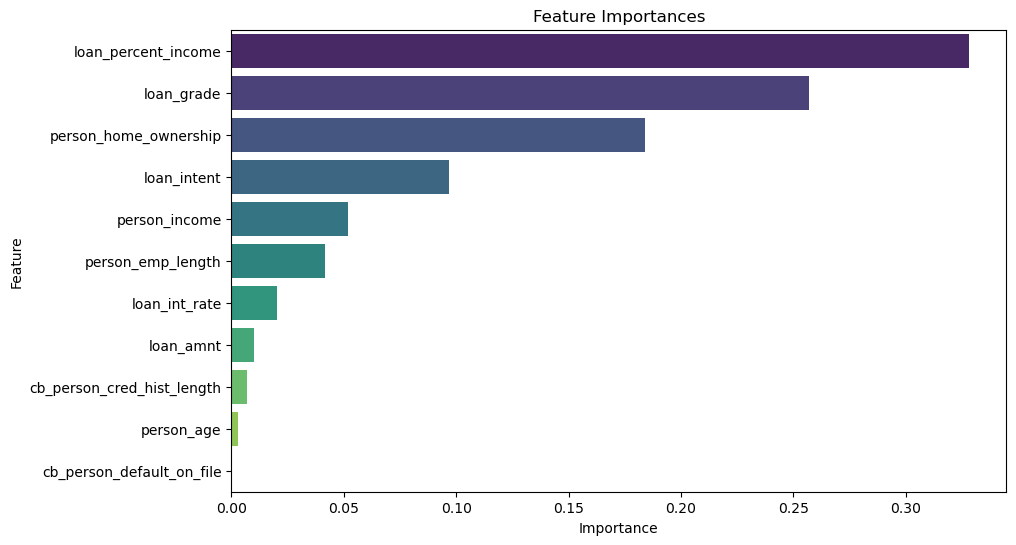

In [102]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis', hue = 'Feature')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [103]:
# Assuming test_data contains 'id' column, remove 'id' column from the test data
X_test = test_data.drop(columns=['id'])  # Remove 'id' column from test data

# Ensure that the test data has the same columns as the training data (no 'id' or 'loan_status')
y_test_pred = best_model.predict(X_test)

# Read the test data with the 'id' column for final output
test_data_with_id = pd.read_csv('test.csv')
id_column = test_data_with_id['id']  # Retrieve the 'id' column

# Create the predictions DataFrame with 'id' and predicted 'loan_status'
predictions_df = pd.DataFrame({
    'id': id_column,
    'predicted_loan_status': y_test_pred
})

# Save predictions to CSV
predictions_df.to_csv('test_predictions_decision.csv', index=False)

### **Random Forest mudel**

In [105]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_val)
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10059
           1       0.93      0.70      0.80      1670

    accuracy                           0.95     11729
   macro avg       0.94      0.85      0.89     11729
weighted avg       0.95      0.95      0.95     11729



In [106]:
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(cm)

tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

Confusion Matrix:
[[9973   86]
 [ 501 1169]]
True Negatives: 9973
False Positives: 86
False Negatives: 501
True Positives: 1169


#### **Omaduste tähtsuse kuvamine ja visualiseerimine**

Omaduste tähtsuse visualiseerimine aitab mõista, millised sisendi omadused mõjutavad mudeli ennustusi kõige rohkem. Tabel ja diagramm annavad selge ülevaate, millised omadused on olulised ja millised vähem olulised, mis võib aidata edasistes analüüsides ja omaduste valiku protsessis.

Feature Importances:
                       Feature  Importance
8          loan_percent_income        0.24
7                loan_int_rate        0.14
5                   loan_grade        0.12
1                person_income        0.11
2        person_home_ownership        0.09
4                  loan_intent        0.07
6                    loan_amnt        0.07
3            person_emp_length        0.06
0                   person_age        0.05
10  cb_person_cred_hist_length        0.04
9    cb_person_default_on_file        0.01


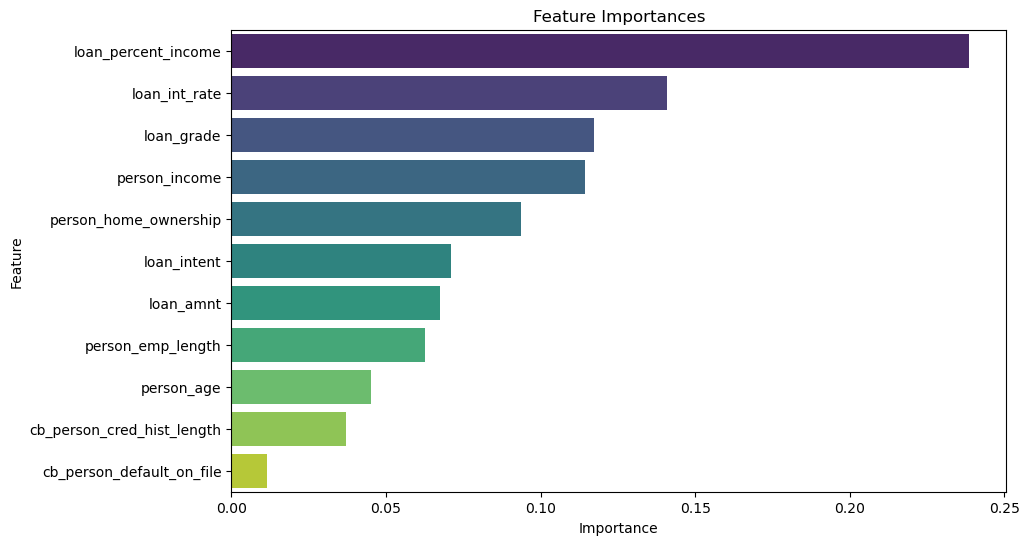

In [108]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis', hue = 'Feature')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### **Testandmete ennustuste tegemine ja tulemuste salvestamine**

testkomplekti ennustamine ja salvestame tulemused CSV faili, säilitades algse 'id' veeru. See võimaldab edaspidi kontrollida, milline on mudeli ennustus iga testandme jaoks. Ennustuste tulemuste vaatamine aitab hinnata mudeli toimivust ja valmistab ette tulemuste analüüsi.

In [110]:
X_test = test_data.drop(columns=['id'])  # Remove 'id' column from test data

print(X_test)
y_test_pred = rf_model.predict(X_test)

test_data_with_id = pd.read_csv('test.csv')
id_column = test_data_with_id['id']

predictions_df = pd.DataFrame({
    'id': id_column,
    'predicted_loan_status': y_test_pred
})

predictions_df.to_csv('test_predictions.csv', index=False)

print("Predictions saved to 'test_predictions.csv'")

print("Predictions for Test Data:")
print(y_test_pred)

       person_age  person_income  person_home_ownership  person_emp_length  \
0              23          69000                      3               3.00   
1              26          96000                      0               6.00   
2              26          30000                      3               5.00   
3              33          50000                      3               4.00   
4              26         102000                      0               8.00   
...           ...            ...                    ...                ...   
39093          22          31200                      0               2.00   
39094          22          48000                      0               6.00   
39095          51          60000                      0               0.00   
39096          22          36000                      0               4.00   
39097          31          45000                      3               6.00   

       loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_

#### **ROC-kõver koos AUC-iga**

Arvutame ja kuvame ROC-kõvera (Receiver Operating Characteristic curve) koos AUC-iga (Area Under the Curve), mis on üks olulisemaid näitajaid, et hinnata mudeli kvaliteeti ja töövõimet. Kõverat arvutatakse kasutades mudeli prognoositavaid tõenäosusi, et leida suhe false positive rate (FPR) ja true positive rate (TPR) erinevate lävede korral.
1) ROC-kõver näitab mudeli suutlikkust eristada positiivseid ja negatiivseid klasse. Ideaalne mudel omaks kõverat, mis oleks võimalikult lähedal koordinaatsüsteemi ülemisele vasakule nurgale, kus TPR on maksimaalne ja FPR on minimaalne.
2) AUC (Area Under the Curve) on näitaja, mis mõõdab kogu kõvera pindala. Väärtus 1,0 tähistab ideaalset mudelit, samas kui väärtus 0,5 viitab juhuslikule klassifitseerimisele. Antud juhul on AUC väärtus mõeldud mudeli täpsuse ja töö kvaliteedi hindamiseks.
\
\
Sellel graafikul on AUC väärtus 0.94, mis viitab sellele, et mudel on väga hea, kuna see eristab positiivseid ja negatiivseid klasse suure täpsusega.

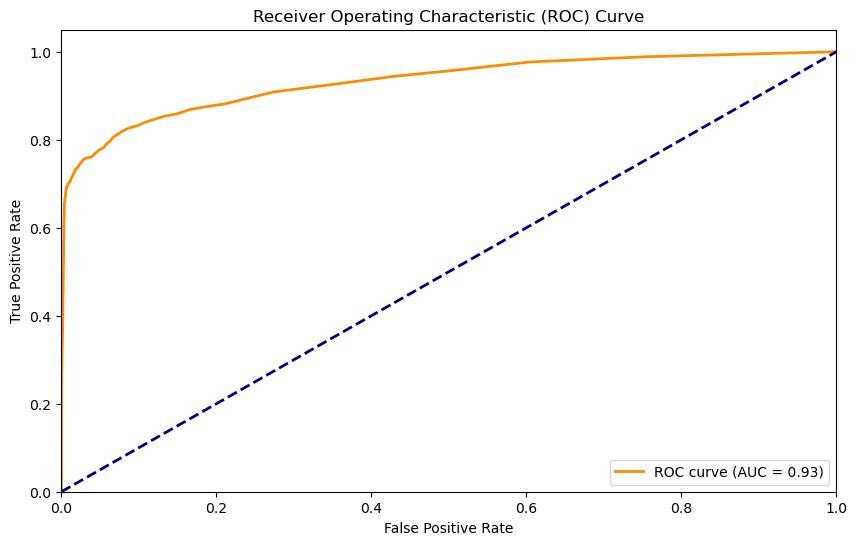

In [112]:
y_pred_prob = rf_model.predict_proba(X_val)[:, 1]  # Eeldame, et 1 on positiivne klass

fnr, tnr, thresholds = roc_curve(y_val, y_pred_prob)

roc_auc = auc(fnr, tnr)

plt.figure(figsize=(10, 6))
plt.plot(fnr, tnr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()